# Imports and setting up viz

NB : conda env1 on Mac, lam1env on spirit (Python3.12)

In [448]:
%load_ext autoreload
%autoreload 2

import numpy as np
import netCDF4 as nc
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import cartopy.crs as ccrs
import cartopy
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from scipy.stats import ttest_ind
%matplotlib inline

#import personnal tools
from tools import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load and edit files

LAM output analysis.

simu irr et simu no-irr.

## Sims

In [449]:
noirr_dir='../../../JZ_simu_outputs/LAM/noirr_2010_2022'
irr_dir='../../../JZ_simu_outputs/LAM/irr_2010_2022'

In [450]:
#open netcdf files for native routing on ORC grid
filename = '{}/SRF/MO/*history.nc'.format(noirr_dir)
ORC0 = xr.open_mfdataset(filename)
#name
ORC0.attrs['name'] = 'no_irr'
#time counter
ORC = ORC0.rename({'time_counter':'time'})
#define vars
ORC['totrunoff'] = ORC['runoff'] + ORC['drainage']
# limit data to lon and lat of interest (-13,6) and (32,49)
# ORC = ORC.sel(lon=slice(-13,6),lat=slice(32,49))
ORC


<xarray.Dataset>
Dimensions:                 (lat: 232, lon: 300, veget: 15, soiltyp: 3,
                             solth: 18, nobio: 1, solay: 11, albtyp: 2,
                             time: 156, axis_nbounds: 2)
Coordinates:
  * lat                     (lat) float32 30.0 30.09 30.17 ... 49.83 49.91 50.0
  * lon                     (lon) float32 -13.0 -12.93 -12.86 ... 7.86 7.93 8.0
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * soiltyp                 (soiltyp) float32 1.0 2.0 3.0
  * solth                   (solth) float32 0.0004888 0.001955 ... 33.53 65.56
  * nobio                   (nobio) float32 1.0
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * albtyp                  (albtyp) float32 1.0 2.0
    time_centered           (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                    (time) datetime64[ns] 2010-01-16T12:00:00 ... 202...
Dimensions without coordinates: axis_nbounds
Data variables: (12/120)
    time_centered_bounds    (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                   (time, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
    Contfrac                (time, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
    swnet                   (time, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
    lwnet                   (time, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
    ...                      ...
    delfastr_daily          (time, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
    delslowr_daily          (time, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
    delstreamr_daily        (time, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
    delstock_routing_daily  (time, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
    soilalb_bg              (time, albtyp, lat, lon) float32 dask.array<chunksize=(1, 2, 232, 300), meta=np.ndarray>
    totrunoff               (time, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
Attributes:
    name:         no_irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Apr-08 20:50:55 GMT
    uuid:         8b9758b9-e8f3-4e3f-ae48-7add1398362f

In [451]:
filename = '{}/SRF/MO/*history.nc'.format(irr_dir)
ORC0irr = xr.open_mfdataset(filename)
#name
ORC0irr.attrs['name'] = 'irr'
#time counter
ORCirr = ORC0irr.rename({'time_counter':'time'})
#define vars
ORCirr['totrunoff'] = ORCirr['runoff'] + ORCirr['drainage']
# limit data to lon and lat of interest (-13,6) and (32,49)
# ORC = ORC.sel(lon=slice(-13,6),lat=slice(32,49))
ORC0irr

<xarray.Dataset>
Dimensions:                 (lat: 232, lon: 300, veget: 15, soiltyp: 3,
                             solth: 18, nobio: 1, solay: 11, albtyp: 2,
                             time_counter: 156, axis_nbounds: 2)
Coordinates:
  * lat                     (lat) float32 30.0 30.09 30.17 ... 49.83 49.91 50.0
  * lon                     (lon) float32 -13.0 -12.93 -12.86 ... 7.86 7.93 8.0
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * soiltyp                 (soiltyp) float32 1.0 2.0 3.0
  * solth                   (solth) float32 0.0004888 0.001955 ... 33.53 65.56
  * nobio                   (nobio) float32 1.0
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * albtyp                  (albtyp) float32 1.0 2.0
    time_centered           (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter            (time_counter) datetime64[ns] 2010-01-16T12:00:00...
Dimensions without coordinates: axis_nbounds
Data variables: (12/127)
    time_centered_bounds    (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds     (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                   (time_counter, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
    Contfrac                (time_counter, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
    swnet                   (time_counter, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
    lwnet                   (time_counter, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
    ...                      ...
    DelSWE_daily            (time_counter, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
    delfastr_daily          (time_counter, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
    delslowr_daily          (time_counter, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
    delstreamr_daily        (time_counter, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
    delstock_routing_daily  (time_counter, lat, lon) float32 dask.array<chunksize=(1, 232, 300), meta=np.ndarray>
    soilalb_bg              (time_counter, albtyp, lat, lon) float32 dask.array<chunksize=(1, 2, 232, 300), meta=np.ndarray>
Attributes:
    name:         irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Apr-08 20:56:20 GMT
    uuid:         1bf4f5bf-aaac-446e-96f9-b10623398784

In [452]:
#sim
filename = '{}/ATM/TS*.nc'.format(noirr_dir)
# filename='/data/ptiengou/JZ_simu_outputs/LAM/noirr_2010_2022/ATM/TS_MO_noirr_precip.nc'
sim0 = xr.open_mfdataset(filename)
sim0.attrs['name'] = 'no_irr'
sim = sim0.rename({'time_counter':'time'})
sim = sim.sel(lon=slice(-13,6),lat=slice(32,49))

sim['evap'] = sim['evap'] *3600 * 24
sim['evap'].attrs['units'] = 'mm/d'
sim['precip'] = sim['precip'] *3600 * 24
sim['precip'].attrs['units'] = 'mm/d'
sim

<xarray.Dataset>
Dimensions:            (time: 156, bnds: 2, lon: 181, lat: 170)
Coordinates:
  * time               (time) datetime64[ns] 2010-01-16T12:00:00 ... 2022-12-...
  * lon                (lon) float32 -13.0 -12.89 -12.79 ... 5.784 5.889 5.995
  * lat                (lat) float32 32.01 32.11 32.21 ... 48.79 48.89 48.99
Dimensions without coordinates: bnds
Data variables:
    time_counter_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(156, 2), meta=np.ndarray>
    cldt               (time, lat, lon) float32 dask.array<chunksize=(156, 170, 181), meta=np.ndarray>
    contfracATM        (time, lat, lon) float32 dask.array<chunksize=(156, 170, 181), meta=np.ndarray>
    evap               (time, lat, lon) float32 dask.array<chunksize=(156, 170, 181), meta=np.ndarray>
    flat               (time, lat, lon) float32 dask.array<chunksize=(156, 170, 181), meta=np.ndarray>
    precip             (time, lat, lon) float32 dask.array<chunksize=(156, 170, 181), meta=np.ndarray>
    sens               (time, lat, lon) float32 dask.array<chunksize=(156, 170, 181), meta=np.ndarray>
    t2m                (time, lat, lon) float32 dask.array<chunksize=(156, 170, 181), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.3.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    name:         no_irr
    description:  Created by xios
    title:        Created by xios
    timeStamp:    2024-Apr-08 20:51:45 GMT
    uuid:         a5b46127-ad8e-4c7a-aabe-d52f3173c847
    history:      Fri Jun 28 15:00:50 2024: cdo mergetime sim14_cldt.nc sim12...
    NCO:          netCDF Operators version 5.0.7 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 2.3.0 (https://mpimet.mpg.de...

In [453]:
#sim irr
filename = '{}/ATM/TS*.nc'.format(irr_dir)
# filename='/data/ptiengou/JZ_simu_outputs/LAM/noirr_2010_2022/ATM/TS_MO_noirr_precip.nc'
sim0irr = xr.open_mfdataset(filename)
sim0irr.attrs['name'] = 'irr'
simirr = sim0irr.rename({'time_counter':'time'})
simirr = simirr.sel(lon=slice(-13,6),lat=slice(32,49))

simirr['evap'] = simirr['evap'] *3600 * 24
simirr['precip'] = simirr['precip'] *3600 * 24
sim0irr


<xarray.Dataset>
Dimensions:            (time_counter: 156, lon: 200, lat: 200, bnds: 2)
Coordinates:
  * time_counter       (time_counter) datetime64[ns] 2010-01-16T12:00:00 ... ...
  * lon                (lon) float32 -13.0 -12.89 -12.79 ... 7.789 7.894 8.0
  * lat                (lat) float32 30.0 30.1 30.2 30.3 ... 49.7 49.8 49.9 50.0
Dimensions without coordinates: bnds
Data variables:
    time_counter_bnds  (time_counter, bnds) datetime64[ns] dask.array<chunksize=(156, 2), meta=np.ndarray>
    cldt               (time_counter, lat, lon) float32 dask.array<chunksize=(156, 200, 200), meta=np.ndarray>
    contfracATM        (time_counter, lat, lon) float32 dask.array<chunksize=(156, 200, 200), meta=np.ndarray>
    evap               (time_counter, lat, lon) float32 dask.array<chunksize=(156, 200, 200), meta=np.ndarray>
    flat               (time_counter, lat, lon) float32 dask.array<chunksize=(156, 200, 200), meta=np.ndarray>
    precip             (time_counter, lat, lon) float32 dask.array<chunksize=(156, 200, 200), meta=np.ndarray>
    sens               (time_counter, lat, lon) float32 dask.array<chunksize=(156, 200, 200), meta=np.ndarray>
    t2m                (time_counter, lat, lon) float32 dask.array<chunksize=(156, 200, 200), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.3.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    name:         irr
    description:  Created by xios
    title:        Created by xios
    timeStamp:    2024-Apr-08 20:57:13 GMT
    uuid:         29e26a36-b630-44f8-a191-bf9e515af81c
    history:      Fri Jun 28 15:03:13 2024: cdo mergetime sim15_cldt.nc sim13...
    NCO:          netCDF Operators version 5.0.7 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 2.3.0 (https://mpimet.mpg.de...

## Obs

In [454]:
#open ERA5 file
filename = '../../../obs/ERA5_eval_2010_2022.nc'
era = xr.open_mfdataset(filename)
era.attrs['name'] = 'ERA5'
#define or edit vars
#name ERA5 vars like in LMDZOR outputs
dict =  {
        'longitude':'lon',
        'latitude':'lat',
        'e':'evap',
        'ro':'totrunoff',
        'tp':'precip'
        }
era = era.rename(dict)

#make evap positive in era
era['evap'] = -era['evap'] * 1000
era['evap'].attrs['units'] = 'mm'
era['precip'] = era['precip']*1000
era['precip'].attrs['units'] = 'mm'
era['cldt'] = era['tcc']*100
era['cldt'].attrs['units'] = '%'
era


<xarray.Dataset>
Dimensions:    (lon: 77, lat: 69, time: 156)
Coordinates:
  * lon        (lon) float32 -13.0 -12.75 -12.5 -12.25 ... 5.25 5.5 5.75 6.0
  * lat        (lat) float32 49.0 48.75 48.5 48.25 ... 32.75 32.5 32.25 32.0
  * time       (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2022-12-01
Data variables:
    u10        (time, lat, lon) float32 dask.array<chunksize=(156, 69, 77), meta=np.ndarray>
    v10        (time, lat, lon) float32 dask.array<chunksize=(156, 69, 77), meta=np.ndarray>
    t2m        (time, lat, lon) float32 dask.array<chunksize=(156, 69, 77), meta=np.ndarray>
    evap       (time, lat, lon) float32 dask.array<chunksize=(156, 69, 77), meta=np.ndarray>
    totrunoff  (time, lat, lon) float32 dask.array<chunksize=(156, 69, 77), meta=np.ndarray>
    precip     (time, lat, lon) float32 dask.array<chunksize=(156, 69, 77), meta=np.ndarray>
    tcc        (time, lat, lon) float32 dask.array<chunksize=(156, 69, 77), meta=np.ndarray>
    cldt       (time, lat, lon) float32 dask.array<chunksize=(156, 69, 77), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.6
    history:                    Wed Jul  3 12:49:08 2024: ncks -A extracted_t...
    NCO:                        netCDF Operators version 5.0.7 (Homepage = ht...
    history_of_appended_files:  Wed Jul  3 12:49:08 2024: Appended file extra...
    name:                       ERA5

In [455]:
#gleam
filename='../../../obs/evap/E_1980-2022_GLEAM_v3.8a_MO.nc'
gleam0=xr.open_dataset(filename)
gleam0.attrs['name']='GLEAM'
gleam = gleam0.sel(lon=slice(-13,6),lat=slice(49,32))
#adapt period
gleam=gleam.sel(time=slice('2010-01-01', '2022-12-31'))
#name gleam vars like in LMDZOR outputs
dict =  {
        'E':'evap'
        }
gleam = gleam.rename(dict)
#convert mm/month to mm/day
gleam['evap']=gleam['evap']/30
gleam['evap'].attrs['units']='mm/d'
gleam

<xarray.Dataset>
Dimensions:  (time: 156, lon: 76, lat: 68)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-31 2010-02-28 ... 2022-12-31
  * lon      (lon) float64 -12.88 -12.62 -12.38 -12.12 ... 5.375 5.625 5.875
  * lat      (lat) float64 48.88 48.62 48.38 48.12 ... 32.88 32.62 32.38 32.12
Data variables:
    evap     (time, lat, lon) float32 nan nan nan nan ... 0.06059 0.05702 0.0631
Attributes:
    name:     GLEAM

In [456]:
filename='../../..//obs/FluxCom/ensemble_rs-_meteo_ALL/monthly/*.RS_METEO.EBC-*.MLM-ALL.METEO-ALL.720_360.monthly.*.nc'
fluxcom0=xr.open_mfdataset(filename)
fluxcom=fluxcom0.sel(lon=slice(-13,6.25),lat=slice(49,32))
fluxcom=fluxcom.sel(time=slice('2010-01-01', '2022-12-31'))

fluxcom.attrs["name"]='FluxCom'

fluxcom['evap'] = fluxcom['LE'] * 0.408 # To convert from MJ/m2/d to mm/d
fluxcom['evap'].attrs['units'] = 'mm/d'

fluxcom['fluxlat'] = fluxcom['LE'] / 0.0864 # To convert from MJ/m2/d to W/m2
fluxcom['fluxlat'].attrs['units'] = 'W/m²'

fluxcom['fluxsens'] = fluxcom['H'] / 0.0864 # To convert from MJ/m2/d to W/m2
fluxcom['fluxsens'].attrs['units'] = 'W/m²'

fluxcom['netrad'] = fluxcom['Rn'] / 0.0864 # To convert from MJ/m2/d to W/m2
fluxcom['netrad'].attrs['units'] = 'W/m²'
fluxcom

<xarray.Dataset>
Dimensions:    (time: 48, lat: 34, lon: 39, nbnds: 2)
Coordinates:
  * lon        (lon) float64 -12.75 -12.25 -11.75 -11.25 ... 4.75 5.25 5.75 6.25
  * lat        (lat) float64 48.75 48.25 47.75 47.25 ... 33.75 33.25 32.75 32.25
  * time       (time) datetime64[ns] 2010-01-16 2010-02-16 ... 2013-12-16
Dimensions without coordinates: nbnds
Data variables: (12/16)
    H          (time, lat, lon) float32 dask.array<chunksize=(12, 34, 39), meta=np.ndarray>
    H_mad      (time, lat, lon) float32 dask.array<chunksize=(12, 34, 39), meta=np.ndarray>
    H_n        (time, lat, lon) float32 dask.array<chunksize=(12, 34, 39), meta=np.ndarray>
    lat_bnds   (time, lat, nbnds) float64 dask.array<chunksize=(12, 34, 2), meta=np.ndarray>
    lon_bnds   (time, lon, nbnds) float64 dask.array<chunksize=(12, 39, 2), meta=np.ndarray>
    time_bnds  (time, nbnds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    ...         ...
    Rn_mad     (time, lat, lon) float32 dask.array<chunksize=(12, 34, 39), meta=np.ndarray>
    Rn_n       (time, lat, lon) float32 dask.array<chunksize=(12, 34, 39), meta=np.ndarray>
    evap       (time, lat, lon) float32 dask.array<chunksize=(12, 34, 39), meta=np.ndarray>
    fluxlat    (time, lat, lon) float32 dask.array<chunksize=(12, 34, 39), meta=np.ndarray>
    fluxsens   (time, lat, lon) float32 dask.array<chunksize=(12, 34, 39), meta=np.ndarray>
    netrad     (time, lat, lon) float32 dask.array<chunksize=(12, 34, 39), meta=np.ndarray>
Attributes: (12/16)
    Comment:                        Ensemble median of 36 members
    Energy_Balance_Correction_EBC:  NONE, BWR, RES
    Machine_Learning_Method_MLM:    RF, ANN, MARS
    Meteorolgical_Data_METEO:       CRUNCEP_v8, WFDEI, CERES_GPCP, GSWP3
    Version:                        v1
    SETUP:                          RS_METEO
    ...                             ...
    Institution:                    MPI-BGC-BGI
    Provided_By:                    Martin Jung [mjung@bgc-jena.mpg.de] on be...
    Created_By:                     Fabian Gans [fgans@bgc-jena.mpg.de], Ulri...
    Temporal_Aggregation_Method:    first interpolate to daily,  second aggre...
    History:                        created: Mon Mar 18 15:20:10 2019
    name:                           FluxCom

In [457]:
#gpcc
filename='../../../obs/precips/precip.mon.total.0.25x0.25.v2020.nc'
gpcc0=xr.open_mfdataset(filename)
gpcc0.attrs['name'] = 'GPCC'
gpcc=gpcc0.sel(time=slice('2010-01-01', '2022-12-31'))
gpcc['lon'] = ((gpcc['lon'] + 180) % 360) - 180
gpcc1 = gpcc.sortby('lon')

# gpcc=gpcc.sel(lon=slice(-13,6.25),lat=slice(32,49))
gpcc=gpcc1.sel(lon=slice(-13,6.25),lat=slice(49,32))

# gpcc1=gpcc.sel(lon=slice(347,360),lat=slice(49,32))
# gpcc2=gpcc.sel(lon=slice(0,6.25),lat=slice(49,32))
# gpcc=xr.combine_by_coords([gpcc1, gpcc2])
# gpcc = gpcc.where(gpcc['lon'] < 6.25, drop=True)

# gpcc['lon']=gpcc['lon']-180.0
# gpcc=gpcc.sel(lon=slice(-13,6.25))

gpcc['precip'] = gpcc['precip'] / 30 #convert to mm/d
gpcc['precip'].attrs['units'] = 'mm/d'
gpcc

<xarray.Dataset>
Dimensions:  (lat: 68, lon: 77, time: 120)
Coordinates:
  * lat      (lat) float32 48.88 48.62 48.38 48.12 ... 32.88 32.62 32.38 32.12
  * lon      (lon) float32 -12.88 -12.62 -12.38 -12.12 ... 5.625 5.875 6.125
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2019-12-01
Data variables:
    precip   (time, lat, lon) float32 dask.array<chunksize=(120, 68, 77), meta=np.ndarray>
Attributes:
    Original_Source:  http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm...
    Reference:        Users of the data sets are kindly requested to give fee...
    original_source:  ftp://ftp-anon.dwd.de/pub/data/gpcc/html/fulldata_downl...
    Conventions:      CF 1.0
    dataset_title:    Global Precipitation Climatology Centre (GPCC)
    title:            GPCC Full Data Reanalysis Version 2020 0.25x0.25 Monthl...
    history:          Created 07/2021  based on V2020 data obtained via wget
    References:       https://www.psl.noaa.gov/data/gridded/data.gpcc.html
    name:             GPCC

# Masking, interpolation, and time period selection

In [483]:
# Select months
months=[7]

# ORC = ORC.sel(time=ORC['time.month'].isin(months))
# ORCirr = ORCirr.sel(time=ORCirr['time.month'].isin(months))

# sim = sim.sel(time=sim['time.month'].isin(months))
# simirr = simirr.sel(time=simirr['time.month'].isin(months))

# era = era.sel(time=era['time.month'].isin(months))
# fluxcom=fluxcom.sel(time=fluxcom['time.month'].isin(months))

In [459]:
#continental fraction mask (LMDZ outputs)
con_mask=sim['contfracATM']>0

#create a masks of data points where irrig_frac >5%
# irr_mask = (ORCirr['irrigmap_dyn']/ORCirr['Areas'])>0.05
irr_mask = con_mask

In [460]:
contSim=sim.where(con_mask)
contSimirr=simirr.where(con_mask)

In [461]:
# irrORC=ORC.where(irr_mask)
# irrORCirr=ORCirr.where(irr_mask)

In [462]:
# era
intEra=era.interp_like(sim)
contEra=intEra.where(con_mask)
orcEra=era.interp_like(ORC)

In [463]:
#gleam
intGleam=gleam.interp_like(sim)
contGleam=gleam.interp_like(sim).where(con_mask)
irrEra=era.interp_like(ORC).where(irr_mask)
irrGleam=gleam.interp_like(ORC).where(irr_mask)

In [464]:
#fluxcom
intFluxcom=fluxcom.interp_like(sim)
contFluxcom=fluxcom.interp_like(sim).where(con_mask)
orcFluxcom=fluxcom.interp_like(ORC)

In [465]:
#gpcc
intGpcc=gpcc.interp_like(sim)
contGpcc=gpcc.interp_like(sim).where(con_mask)

# Maps

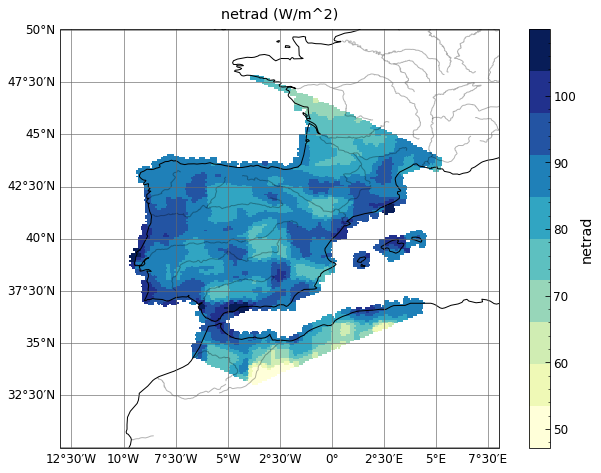

In [466]:
#Display map of var for ds
var='netrad'
ds=ORC
color_map=wet
max_value=None

map_ave(ds, var, in_cmap=color_map, in_vmax=max_value)

Text(0.5, 1.0, 'evap (no_irr)')

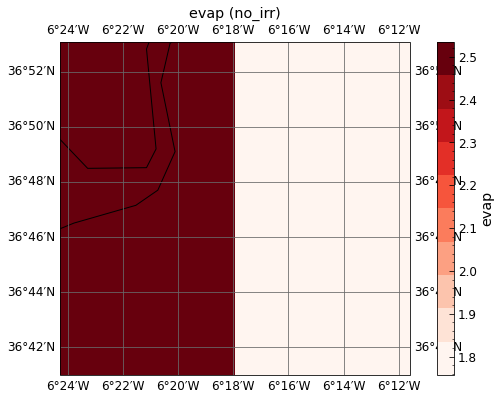

In [467]:
#Display map of var for ds on restricted area
var='evap'
ds = sim
# ds = std
latmin=36.7
latmax=36.9
lonmin=-6.4
lonmax=-6.2

#restrict ds to latmin, latmax, lonmin, lonmax
ds = ds.where(ds.lat >= latmin, drop=True)
ds = ds.where(ds.lat <= latmax, drop=True)
ds = ds.where(ds.lon >= lonmin, drop=True)
ds = ds.where(ds.lon <= lonmax, drop=True)
plotvar = ds[var].mean(dim='time')
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
#use colormap reds
plotvar.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=reds)
plt.title(var + ' (' + ds.name + ')')

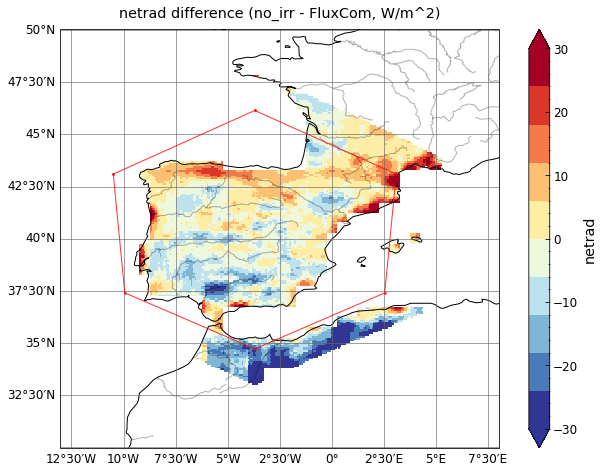

In [485]:
#Diff map
months=[7]
var='netrad'
max_value=30
ds1=ORC.sel(time=ORC['time.month'].isin(months))
ds2=orcFluxcom.sel(time=orcFluxcom['time.month'].isin(months))
# title = 'Total cloud cover bias vs ERA5 (August, mm/day)'
map_diff_ave(ds1, ds2, var, in_vmax=max_value, hex=True, sig=False)

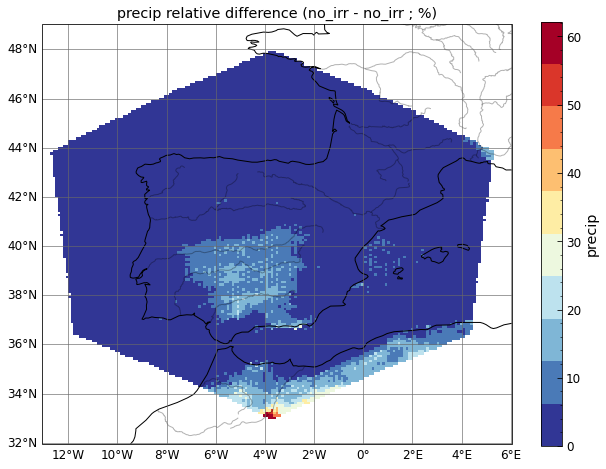

In [469]:
#Relative diff map
var='precip'
max_value=None
ds1=sim
ds2=sim
# plt.title('Gross primary production relative difference (%)')
map_rel_diff_ave(ds1, ds2, var, in_vmax=max_value)

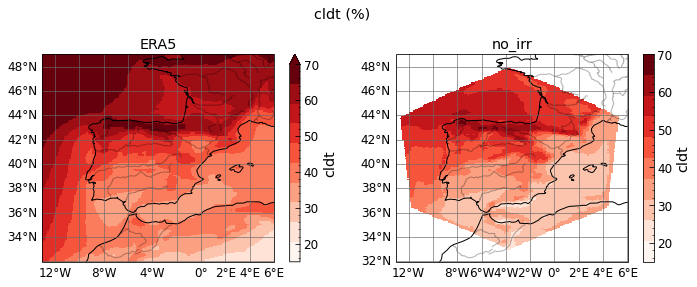

In [470]:
# Display 2 maps of var
var = 'cldt'
min_value=15
max_value=70
color_map=reds
ds1 = intEra
ds2 = sim
map_two_ds(ds1, ds2, var, in_vmin=min_value, in_vmax=max_value, in_cmap=color_map)

# Time series

In [486]:
ts_var='netrad'

# ds1=contSim
# ds2=contSimirr
# ds3=contEra
# ds4=contGleam
# ds5=contFluxcom

ds1=ORC
ds2=ORCirr
ds3=orcFluxcom

ds_list=[ds1, ds2, ds3]#, ds4, ds5]

year_max=2013

Text(0.5, 0, '')

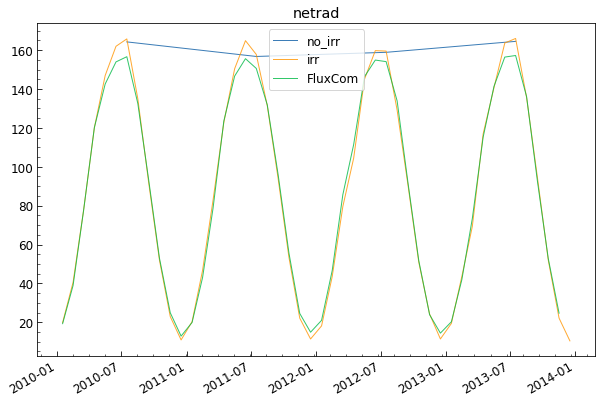

In [487]:
#Average time series
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()

for ds in ds_list:
    ds = ds.where(ds['time.year'] <= year_max, drop=True)
    (ds[ts_var]*1).mean(dim=['lon','lat']).plot(ax=ax, label=ds.name)

plt.title(ts_var)
plt.legend()
ax.set_ylabel('')
ax.set_xlabel('')

no_irr : 85.489044 W/m²
irr : 85.88591 W/m²
FluxCom : 87.53463 W/m²


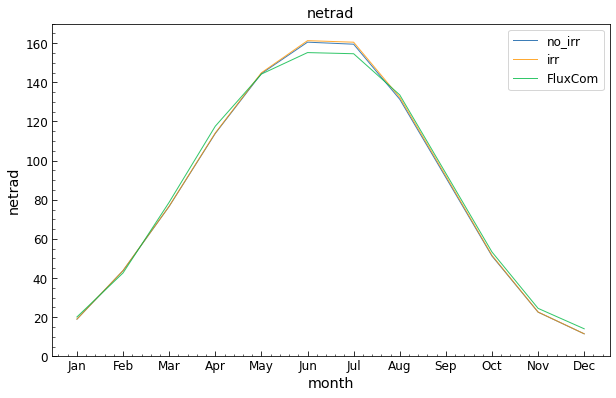

In [475]:
#Average seasonnal cycle
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(months)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_ylim(bottom=0)
ax.set_ylim(top=170)

for ds in ds_list:
    # ds = ds.where(ds['time.year'] <= year_max, drop=True)
    # ds = ds.where(ds['time.year'] >= year_min, drop=True).where(ds['time.year'] <= year_max, drop=True)
    print(ds.attrs['name'] + ' : ' + str(ds[ts_var].mean(dim=['lon','lat', 'time']).values) + ' W/m²')
    ds[ts_var].mean(dim=['lon','lat']).groupby('time.month').mean(dim='time').plot(ax=ax, label=ds.name)

plt.title(ts_var)
# plt.title("Mean seasonnal cycle of precipitation on continents (mm/day)")
plt.legend()